In [1]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\512gb\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: datasist, imbalanced-learn, scikit-learn-intelex


# PROJECT TOPIC
## PREDICT THE PERFORMANCE OF A FOOTBALL PLAYER BASED ON                      PHYSICAL AND TECHNICAL ABILITIES(DEPLOY FOR REAL LIFE PRODUCTION)

<img src='players.jfif' width=1500 height=100>

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Fea">Feature Engineering/Data Preprocessing</a></li>
<li><a href="#mod">Modeling</a></li>
<li><a href="#modeva">Model Evaluation</a></li>
<li><a href="#hyp">HyperParameter Optimization</a></li>
<li><a href="#cev">CrossEvaluation</a></li>
<li><a href="#conc">Conclusions</a></li>
 <li><a href="#ref">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

<a id='Fea'></a>
## Feature Engineering/Data Preprocessing

In [2]:
#import all the necessary libraries
SEED= 1221
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#import GradientBoostingClassifier as xg
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [3]:
#load all the datasets from 2020 to 2022
data20= pd.read_csv('players_20.csv')
data21= pd.read_csv('players_21.csv')
data22= pd.read_csv('players_22.csv')

In [4]:
#diplay the first 5 rows
data20.head(1)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, CF, ST",94,94,95500000.0,560000.0,32,1987-06-24,170,72,241.0,FC Barcelona,Spain Primera Division,1.0,RW,10.0,NaN,2004-07-01,2021.0,52,Argentina,NaN,NaN,NaN,Left,4,4,5,Medium/Low,Unique,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...","Finesse Shot, Long Shot Taker (AI), Speed Drib...",87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,NaN,89+5,89+5,89+5,93+1,93+1,93+1,93+1,93+1,94,94,94,92+2,87+6,87+6,87+6,92+2,68+6,66+6,66+6,66+6,68+6,63+6,53+6,53+6,53+6,63+6,19+6,https://cdn.sofifa.net/players/158/023/20_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/ar.png


In [5]:
#display the last 5 rows
data21.head(1)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,1987-06-24,170,72,241.0,FC Barcelona,Spain Primera Division,1.0,CAM,10.0,NaN,2004-07-01,2021.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Speed Drib...",85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,32,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png


In [6]:
data22.head(1)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png


In [7]:
print(data20.columns) #display the columns and dimension of data
print(data20.shape)

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)
(18483, 110)


In [8]:
print(data21.columns) #display the columns and dimension of data
print(data21.shape)

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)
(18944, 110)


In [9]:
print(data22.columns) #display the columns and dimension of data
print(data22.shape)

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)
(19239, 110)


In [10]:
#join the 2020 and 2021 data
merge_data= pd.concat([data20,data21],axis=0)
print(merge_data.shape)

(37427, 110)


In [11]:
# join the 2020, 2021 and 2022 data
data= pd.concat([merge_data,data22],axis=0)
print(data.shape)

(56666, 110)


In [12]:
#display all the rows amd 110 features
data.iloc[:,0:110]

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, CF, ST",94,94,95500000.0,560000.0,32,1987-06-24,170,72,241.0,FC Barcelona,Spain Primera Division,1.0,RW,10.0,NaN,2004-07-01,2021.0,52,Argentina,NaN,NaN,NaN,Left,4,4,5,Medium/Low,Unique,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...","Finesse Shot, Long Shot Taker (AI), Speed Drib...",87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,NaN,89+5,89+5,89+5,93+1,93+1,93+1,93+1,93+1,94,94,94,92+2,87+6,87+6,87+6,92+2,68+6,66+6,66+6,66+6,68+6,63+6,53+6,53+6,53+6,63+6,19+6,https://cdn.sofifa.net/players/158/023/20_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",93,93,58500000.0,410000.0,34,1985-02-05,187,83,45.0,Juventus,Italian Serie A,1.0,LW,7.0,NaN,2018-07-10,2022.0,38,Portugal,1354.0,LS,7.0,Right,4,5,5,High/Low,Unique,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,NaN,91+2,91+2,91+2,90,91,91,91,90,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,62+3,62+3,62+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/20_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",92,92,105500000.0,290000.0,27,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,CAM,10.0,NaN,2017-08-03,2022.0,54,Brazil,1370.0,LW,10.0,Right,5,5,5,High/Medium,Unique,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker, #Crosser, #...","Injury Prone, Flair, Speed Dribbler (AI), Outs...",91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,NaN,84+6,84+6,84+6,91+1,90+2,90+2,90+2,91+1,90+2,90+2,90+2,90+2,83+6,83+6,83+6,90+2,67+6,61+6,61+6,61+6,67+6,61+6,47+6,47+6,47+6,61+6,20+6,https://cdn.sofifa.net/players/190/871/20_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1370/60.png,https://cdn.sofifa.net/flags/br.png
3,183277,https://sofifa.c

In [13]:
data= data[['short_name', 'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_position',
       'club_jersey_number', 'club_joined', 'club_contract_valid_until',
       'nationality_name', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'release_clause_eur',
       'player_traits', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy']]

In [14]:
data.columns

Index(['short_name', 'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_position',
       'club_jersey_number', 'club_joined', 'club_contract_valid_until',
       'nationality_name', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'release_clause_eur',
       'player_traits', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy'],
      dtype='object')

In [15]:
#drop some varibles that may not have good effect on the target
data= data.drop(columns=['short_name','dob','club_name','league_name', 'player_positions',
                        'nationality_name','international_reputation','club_team_id','player_traits','club_joined'
                        ],axis=1)

In [16]:
data.duplicated().sum() #check for  duplicates

0

In [17]:
data['overall'].describe() #run summary statistics of the overall variable

count    56666.000000
mean        65.879804
std          6.947807
min         47.000000
25%         61.000000
50%         66.000000
75%         70.000000
max         94.000000
Name: overall, dtype: float64

In [18]:
#check the length of the three buckets from the summary statistics above
print(len(data[data.overall<70].index))
print(len(data[data.overall>70].index))

40134
13872


In [19]:
#use for loop to create a performance column based on the over all feature.
cat= []

for i,v in data['overall'].items():
    if v<= 70:
        cat.append("Low")
    elif v > 70:
        cat.append("High")
data["Performance"]=cat

In [20]:
data["Performance"].value_counts()

Low     42794
High    13872
Name: Performance, dtype: int64

> - **The Overall column is the best variable for creating a performance column(target) since the overall variable is a summary of all the features of the players in the football team. It would be biased of i used the average of the players as my statistic to create a performance column, infact it will deceive the model to see overall variable as the only good feature.
so i used the 25th , 50th and 75th quartile of the overall varible to create the target column.**

In [21]:
#check the data types
data.dtypes

overall                         int64
potential                       int64
value_eur                     float64
wage_eur                      float64
age                             int64
height_cm                       int64
weight_kg                       int64
league_level                  float64
club_position                  object
club_jersey_number            float64
club_contract_valid_until     float64
preferred_foot                 object
weak_foot                       int64
skill_moves                     int64
work_rate                      object
release_clause_eur            float64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
attacking_crossing              int64
attacking_finishing             int64
attacking_heading_accuracy      int64
Performance                    object
dtype: objec

In [22]:
data.shape

(56666, 26)

In [23]:
# give write description to the data
data= data.rename({'skill_fk_accuracy':'skill_freekick_accuracy'}, axis=1)

In [24]:
#check the values in the column
data['work_rate'].unique()

array(['Medium/Low', 'High/Low', 'High/Medium', 'High/High',
       'Medium/Medium', 'Medium/High', 'Low/High', 'Low/Medium',
       'Low/Low'], dtype=object)

>  **The values in the work rate varible of players shows that they are some how ordianl categorical data.
hence in subsequent cells i will encode them**

In [25]:
#check for number of missing values in each feature
data.isnull().sum()

overall                          0
potential                        0
value_eur                      561
wage_eur                       526
age                              0
height_cm                        0
weight_kg                        0
league_level                   911
club_position                  526
club_jersey_number             526
club_contract_valid_until      526
preferred_foot                   0
weak_foot                        0
skill_moves                      0
work_rate                        0
release_clause_eur            3469
pace                          6276
shooting                      6276
passing                       6276
dribbling                     6276
defending                     6276
physic                        6276
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
Performance                      0
dtype: int64

In [26]:
#separate the dataframe into numerical and object data
num_data= data.select_dtypes(include=[np.number])
obj_data= data.select_dtypes(exclude=[np.number])

In [27]:
#get the median of each variable
num_data.median()

overall                            66.0
potential                          71.0
value_eur                      875000.0
wage_eur                         3000.0
age                                25.0
height_cm                         181.0
weight_kg                          75.0
league_level                        1.0
club_jersey_number                 18.0
club_contract_valid_until        2022.0
weak_foot                           3.0
skill_moves                         2.0
release_clause_eur            1300000.0
pace                               69.0
shooting                           54.0
passing                            58.0
dribbling                          64.0
defending                          56.0
physic                             66.0
attacking_crossing                 54.0
attacking_finishing                49.0
attacking_heading_accuracy         55.0
dtype: float64

In [28]:
num_data.head(2)

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_jersey_number,club_contract_valid_until,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy
0,94,94,95500000.0,560000.0,32,170,72,1.0,10.0,2021.0,4,4,195800000.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70
1,93,93,58500000.0,410000.0,34,187,83,1.0,7.0,2022.0,4,5,96500000.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89


In [29]:
obj_data.head(2)

,club_position,preferred_foot,work_rate,Performance
0,RW,Left,Medium/Low,High
1,LW,Right,High/Low,High


In [30]:
#fill the variable with the median
num_data.fillna(num_data.median(), inplace=True)

>> **The median is a better statistic to fill the empty rows beacuse if mean were used, often times mean is affected by the presence of outliers, hence i had to use the median instead.**

In [31]:
#comfirm that the missing values are removed
num_data.isnull().sum()

overall                       0
potential                     0
value_eur                     0
wage_eur                      0
age                           0
height_cm                     0
weight_kg                     0
league_level                  0
club_jersey_number            0
club_contract_valid_until     0
weak_foot                     0
skill_moves                   0
release_clause_eur            0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
dtype: int64

In [32]:
#fill the categorical varibles with the mode
obj_data.isnull().sum()

club_position     526
preferred_foot      0
work_rate           0
Performance         0
dtype: int64

In [33]:
#drup the club position column since it is not too important
obj_data=obj_data.drop(columns=['club_position'],axis=1)

In [34]:
obj_data.isnull().sum()

preferred_foot    0
work_rate         0
Performance       0
dtype: int64

> **Since we have a lot of rows and removing just 61 rows out of more than 19,000 rows is not even up to 50% of the observations, hence it will not affect our model at all, as we cannot afford to build a model will missing values.**

In [35]:
#join the numerical and categorical data
data= pd.concat([num_data,obj_data],axis=1)
data.isnull().sum()

overall                       0
potential                     0
value_eur                     0
wage_eur                      0
age                           0
height_cm                     0
weight_kg                     0
league_level                  0
club_jersey_number            0
club_contract_valid_until     0
weak_foot                     0
skill_moves                   0
release_clause_eur            0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
preferred_foot                0
work_rate                     0
Performance                   0
dtype: int64

In [36]:
data.head()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_jersey_number,club_contract_valid_until,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,preferred_foot,work_rate,Performance
0,94,94,95500000.0,560000.0,32,170,72,1.0,10.0,2021.0,4,4,195800000.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,Left,Medium/Low,High
1,93,93,58500000.0,410000.0,34,187,83,1.0,7.0,2022.0,4,5,96500000.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,Right,High/Low,High
2,92,92,105500000.0,290000.0,27,175,68,1.0,10.0,2022.0,5,5,195200000.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,Right,High/Medium,High
3,91,91,90000000.0,470000.0,28,175,74,1.0,7.0,2024.0,4,4,184500000.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,Right,High/Medium,High
4,91,91,90000000.0,370000.0,28,181,70,1.0,17.0,2023.0,5,4,166500000.0,76.0,86.0,92.0,86.0,61.0,78.0,93,82,55,Right,High/High,High


In [37]:
# perform one hot encoding on the categorical variables
dummies= pd.get_dummies(data[['preferred_foot','work_rate']], drop_first=True)

In [38]:
dummies.head()

,preferred_foot_Right,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium
0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [39]:
data= pd.concat([data,dummies],axis=1)
data= data.drop(columns=['work_rate','preferred_foot'],axis=1)

In [40]:
data.dtypes

overall                         int64
potential                       int64
value_eur                     float64
wage_eur                      float64
age                             int64
height_cm                       int64
weight_kg                       int64
league_level                  float64
club_jersey_number            float64
club_contract_valid_until     float64
weak_foot                       int64
skill_moves                     int64
release_clause_eur            float64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
attacking_crossing              int64
attacking_finishing             int64
attacking_heading_accuracy      int64
Performance                    object
preferred_foot_Right            uint8
work_rate_High/Low              uint8
work_rate_High/Medium           uint8
work_rate_Lo

In [41]:
#get the 1st and 3rd quartile in order to detect the outliers in the dataset
Q1 = data.quantile(.25, axis=0)
Q3=  data.quantile(.75, axis=0)
IQR= Q3-Q1

In [42]:
#check for out liers
data_outliers=data[((data < (Q1-1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_outliers.head(2)

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_jersey_number,club_contract_valid_until,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,Performance,preferred_foot_Right,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium
0,94,94,95500000.0,560000.0,32,170,72,1.0,10.0,2021.0,4,4,195800000.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,High,0,0,0,0,0,0,0,1,0
1,93,93,58500000.0,410000.0,34,187,83,1.0,7.0,2022.0,4,5,96500000.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,High,1,1,0,0,0,0,0,0,0


In [43]:
#comvert the target column into categorical variable
data['Performance']=data['Performance'].astype('category')

In [44]:
#display the frequency of each valuein descending order
a=data['Performance'].value_counts()
a

Low     42794
High    13872
Name: Performance, dtype: int64

In [45]:
data['Performance'].dtype

CategoricalDtype(categories=['High', 'Low'], ordered=False)

In [46]:
data['Performance']= data['Performance'].replace({'High':1,'Low':0})

In [47]:
data=data.drop(columns=['overall'],axis=1)

> **It is very paramount for met to drop the overall column because it was used to create the performance column, leaving it is definately going to intoduce a bias in the project. Hence i had to drop the variable.**

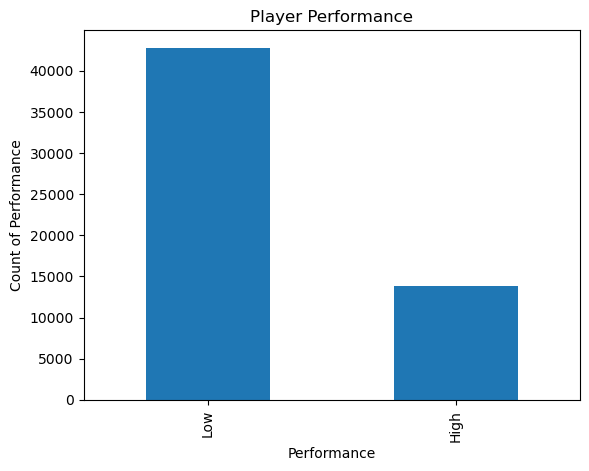

In [48]:
#create a bar plot for the performance column
a.plot(kind='bar')
plt.title('Player Performance')
plt.xlabel('Performance')
plt.ylabel('Count of Performance');

> **The data is not balance, it can affect the model, hence i will deal with that.**

In [49]:
data['Performance'].value_counts()

0    42794
1    13872
Name: Performance, dtype: int64

In [50]:
data.columns

Index(['potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg',
       'league_level', 'club_jersey_number', 'club_contract_valid_until',
       'weak_foot', 'skill_moves', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy', 'Performance',
       'preferred_foot_Right', 'work_rate_High/Low', 'work_rate_High/Medium',
       'work_rate_Low/High', 'work_rate_Low/Low', 'work_rate_Low/Medium',
       'work_rate_Medium/High', 'work_rate_Medium/Low',
       'work_rate_Medium/Medium'],
      dtype='object')

In [51]:
data.rename(columns={'work_rate_High/High':'work_rate_High_High',
                          'work_rate_High/Low':'work_rate_High_Low',
                          'work_rate_High/Medium':'work_rate_High_Medium',
                          'work_rate_Low/High':'work_rate_Low_High',
                          'work_rate_Low/Low':'work_rate_Low_Low',
                          'work_rate_Low/Medium':'work_rate_Low_Medium',
                          'work_rate_Medium/High':'work_rate_Medium_High',
                          'work_rate_Medium/Low':'work_rate_Medium_Low',
                          'work_rate_Medium/Medium':'work_rate_Medium_Medium'}, inplace=True)

In [52]:
data.columns

Index(['potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg',
       'league_level', 'club_jersey_number', 'club_contract_valid_until',
       'weak_foot', 'skill_moves', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy', 'Performance',
       'preferred_foot_Right', 'work_rate_High_Low', 'work_rate_High_Medium',
       'work_rate_Low_High', 'work_rate_Low_Low', 'work_rate_Low_Medium',
       'work_rate_Medium_High', 'work_rate_Medium_Low',
       'work_rate_Medium_Medium'],
      dtype='object')

In [53]:
#make sure the data is balanced
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data[(data['Performance']==0)] 
df_minority = data[(data['Performance']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 42794, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
data = pd.concat([df_minority_upsampled, df_majority])

In [54]:
#create the the target and features 
x= data.drop(columns=['Performance'], axis=1)
y= data['Performance']

In [55]:
x.dtypes

potential                       int64
value_eur                     float64
wage_eur                      float64
age                             int64
height_cm                       int64
weight_kg                       int64
league_level                  float64
club_jersey_number            float64
club_contract_valid_until     float64
weak_foot                       int64
skill_moves                     int64
release_clause_eur            float64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
attacking_crossing              int64
attacking_finishing             int64
attacking_heading_accuracy      int64
preferred_foot_Right            uint8
work_rate_High_Low              uint8
work_rate_High_Medium           uint8
work_rate_Low_High              uint8
work_rate_Low_Low               uint8
work_rate_Lo

In [56]:
for col in x.columns:
    x[col]=x[col].astype(float)

In [57]:
x.dtypes

potential                     float64
value_eur                     float64
wage_eur                      float64
age                           float64
height_cm                     float64
weight_kg                     float64
league_level                  float64
club_jersey_number            float64
club_contract_valid_until     float64
weak_foot                     float64
skill_moves                   float64
release_clause_eur            float64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
attacking_crossing            float64
attacking_finishing           float64
attacking_heading_accuracy    float64
preferred_foot_Right          float64
work_rate_High_Low            float64
work_rate_High_Medium         float64
work_rate_Low_High            float64
work_rate_Low_Low             float64
work_rate_Lo

In [58]:
data.to_csv('train_data.csv')
x.to_csv('x_train_data.csv')

In [59]:
# split the data into train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, shuffle=True, random_state= 24)

#get the dimension
x_train.shape, y_train.shape

((59911, 30), (59911,))

In [60]:
# scale the features 
#normalize the features 

scaler = StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled=  scaler.fit_transform(x_test)

In [61]:
#Perform GridsearchCV to tune best-fit LR model
param = {'C': [10**-2, 10**-1, 10**0, 10**1,10**2]}

lr_model= LogisticRegression(penalty='l1', solver='liblinear')

gs_model=GridSearchCV(estimator=lr_model, param_grid=param)

gs_model.fit(x_train_scaled, y_train)

#Train a model with best parameters
model=LogisticRegression(**gs_model.best_params_, penalty='l1', solver='liblinear')

#fit the train and test data
model.fit(x_train_scaled, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [62]:
#show the coefficients of the model
coefficients= model.coef_[0]
coefficients

array([ 1.45414737e+00,  2.54260715e+01,  1.95199353e+00,  3.50865474e+00,
       -7.70684895e-02,  2.46522971e-01, -2.33698990e-01, -1.24927287e-01,
        1.11004787e-02,  7.79007403e-03,  1.40960961e-01,  7.62118004e+00,
        3.67915898e-01,  5.41767166e-01,  6.91314167e-01,  2.76760826e-01,
        4.64376477e-01,  4.06222434e-01, -4.10064558e-01, -7.03385504e-01,
        4.19586266e-01, -1.87640197e-02,  6.62833676e-02,  9.95453781e-02,
        6.70864644e-02, -1.09585148e-01,  1.00252352e-01,  7.71763089e-02,
        1.37684948e-01,  5.44351036e-02])

In [63]:
coefficients!=0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [64]:
#get out the good features
good_features= pd.Series(x.columns)[list(coefficients !=0)]
good_features

0                      potential
1                      value_eur
2                       wage_eur
3                            age
4                      height_cm
5                      weight_kg
6                   league_level
7             club_jersey_number
8      club_contract_valid_until
9                      weak_foot
10                   skill_moves
11            release_clause_eur
12                          pace
13                      shooting
14                       passing
15                     dribbling
16                     defending
17                        physic
18            attacking_crossing
19           attacking_finishing
20    attacking_heading_accuracy
21          preferred_foot_Right
22            work_rate_High_Low
23         work_rate_High_Medium
24            work_rate_Low_High
25             work_rate_Low_Low
26          work_rate_Low_Medium
27         work_rate_Medium_High
28          work_rate_Medium_Low
29       work_rate_Medium_Medium
dtype: obj

In [65]:
#use feature importance technique to get the important features
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
1,value_eur,25.426071
11,release_clause_eur,7.621180
3,age,3.508655
2,wage_eur,1.951994
0,potential,1.454147
14,passing,0.691314
13,shooting,0.541767
16,defending,0.464376
20,attacking_heading_accuracy,0.419586
17,physic,0.406222


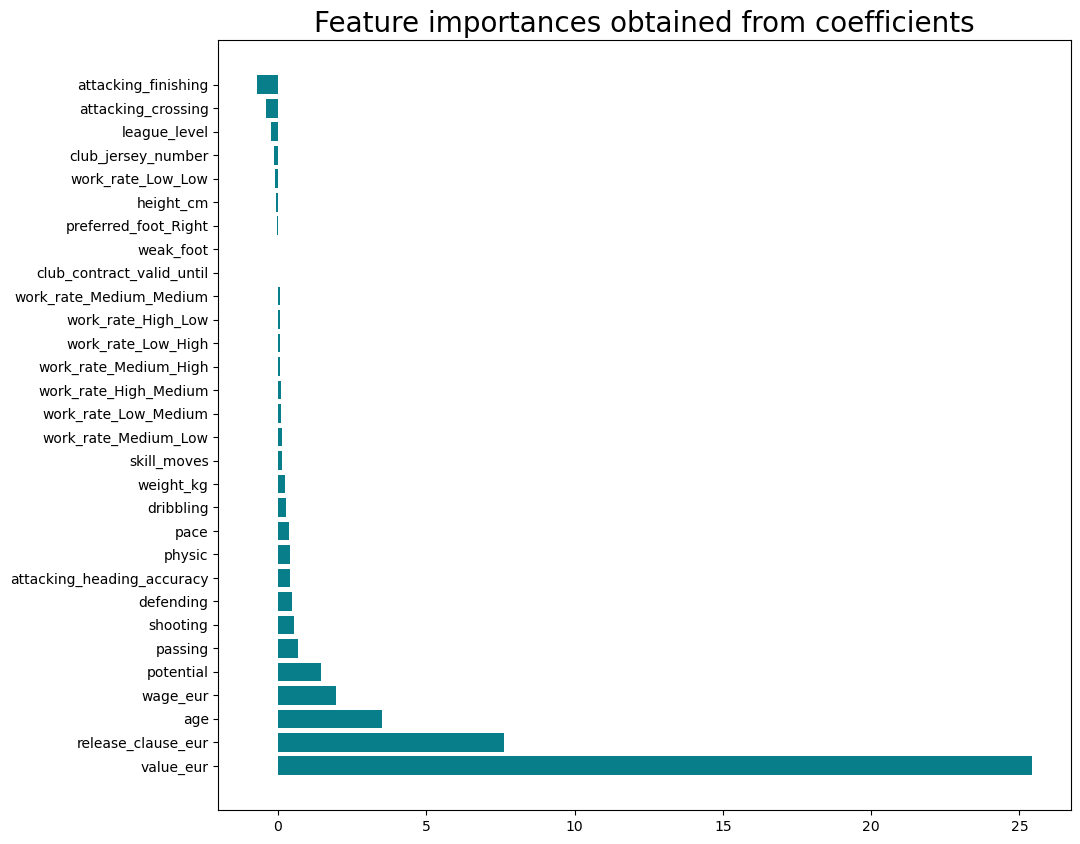

In [66]:
plt.figure(figsize=[11,10])

plt.barh(importances['Attribute'], importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
#plt.xticks(rotation='vertical')
plt.show()

<a id='mod'></a>
## Modeling

In [67]:
#split the data
x = data.drop(columns=['Performance'], axis=1)
y = data['Performance']

#now split the the data again
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, shuffle=True, random_state=14)

#display the dimension of the train data
x_train.shape, y_train.shape



((59911, 30), (59911,))

In [68]:
#scaled the x_train and x_test
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.fit_transform(x_test)

In [69]:
# Train a logistic regression model

regmodel= LogisticRegression()
regmodel.fit(x_train_scaled, y_train)
pred1= regmodel.predict(x_test_scaled)
prob= regmodel.predict_proba(x_test_scaled)

In [70]:
#Train a random forest model
randomforest= RandomForestClassifier()
randomforest.fit(x_train_scaled,y_train)
pred2=randomforest.predict(x_test_scaled)


#Train a deciion tree model
tree= DecisionTreeClassifier()
tree.fit(x_train_scaled, y_train)
pred3=tree.predict(x_test_scaled)


In [71]:

#Train a xgboost classifier model
xgb=XGBClassifier()
xgb.fit(x_train_scaled, y_train)
pred4=xgb.predict(x_test_scaled)


In [72]:
#Train a gradientboost model
gb=GradientBoostingClassifier()
gb.fit(x_train_scaled, y_train)
pred5=gb.predict(x_test_scaled)

<a id='modeva'></a>
## Model Evaluation

In [73]:
#evaluate logistic regression model
cm=confusion_matrix(y_test, pred1)
cr= classification_report(y_test, pred1)
print(cm)

[[12371   452]
 [  496 12358]]


In [74]:
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     12823
           1       0.96      0.96      0.96     12854

    accuracy                           0.96     25677
   macro avg       0.96      0.96      0.96     25677
weighted avg       0.96      0.96      0.96     25677



In [75]:
#evaluate random_forest model
cm= confusion_matrix(y_test, pred2)
cr= classification_report(y_test, pred2)
print(cm)

[[12719   104]
 [   28 12826]]


In [76]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12823
           1       0.99      1.00      0.99     12854

    accuracy                           0.99     25677
   macro avg       0.99      0.99      0.99     25677
weighted avg       0.99      0.99      0.99     25677



#evaluate decision tree model
cm= confusion_matrix(y_test, pred3)
cr= classification_report(y_test, pred3)
print(cm)

print(cr)

In [77]:
#evaluate xgbclassifier model
cm= confusion_matrix(y_test, pred4)
cr= classification_report(y_test, pred4)
print(cm)

[[12789    34]
 [  118 12736]]


In [78]:
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12823
           1       1.00      0.99      0.99     12854

    accuracy                           0.99     25677
   macro avg       0.99      0.99      0.99     25677
weighted avg       0.99      0.99      0.99     25677



In [79]:
#evaluate gradient boosting classfier
cm= confusion_matrix(y_test, pred5)
cr= classification_report(y_test, pred5)
print(cm)

[[12698   125]
 [  153 12701]]


In [80]:
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12823
           1       0.99      0.99      0.99     12854

    accuracy                           0.99     25677
   macro avg       0.99      0.99      0.99     25677
weighted avg       0.99      0.99      0.99     25677



**Random Forest Model i considered as the best model here.**

#### `Low Performance(0 class)`
> **From the metrics displayed , it is seen that the precision of the class of players with low perfromance is 100% that is of all the positive predictions in that class class the model was able correctly predict 100% of them correctly. The Recall of the class of players with Low performance showed that of all the observations that are actually positive how many of them were predicted positive, so the model was able to predict 99% of the observations correctly positive. It also has a very high f1score of 99%.**

#### `High Performance(1 class)`
> **Looking at the High class performance of players, the model was able to correctly predict 99% of the positive predictions well in that class based on the precisio metric. It gave a recall of 100% which means that of  all the cases that players were actually of high performance it was able to predict 100% of  the players with high performance.**




<a id='conc'></a>
## Conclusions

> - Hence The Random Forest model is the best model for this project with very high metrics as follows
- Precision: 100%, 99%  for the low and  high class respectively
- Recall : 99%, 100%  for   the low and  high class respectively
- f1 score : 99%, 99% for  the low and  high class respectively

<a id='ref'></a>
## References
Sofifa.com
https://www.blackindata.co.uk/exploratory-data-analysis-expounded-with-fifa-2021part-1/
https://benmwesigwa.com/2018/09/25/football-performance/
https://barcainnovationhub.com/the-influence-of-age-on-footballers-performance/#:~:text=The%20percentage%20of%20successful%20passes,decision%20making%20and%20game%20intelligence.
https://www.quora.com/At-what-age-does-a-soccer-player-start-being-considered-old
https://betterdatascience.com/feature-importance-python/#:~:text=Probably%20the%20easiest%20way%20to,assigned%20to%20each%20input%20value.
https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html





In [81]:
input_data = (3,4,5,2,3,4,5,5,6,7,78,9,6,5,4,44,45,56,67,7,7,6,65,4,4,3,3,3,2,22)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = randomforest.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Low Performance')
else:
  print('High Performance')

[1]
High Performance


In [82]:
#create a pickle file
import pickle
filename = 'performance_model.sav'
pickle.dump(randomforest, open(filename, 'wb'))


In [83]:
#load the model
loaded_model= pickle.load(open('performance_model.sav','rb'))

In [84]:
input_data = (73.0,525000.0,22000.0,34.0,180.0,75.0,1.0,16.0,2021.0,3.0,1.0,3600000.0,69.0,54.0,58.0,64.0,56.0,66.0
,12.0,11.0,13.0,1.0,0.0,0.0,0.0, 0.0,0.0,0.0,0.0,1.0
)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] ==0):
  print('Low Performance')
else:
  print('High Performance')

[1]
High Performance
